<a href="https://colab.research.google.com/github/Love1117/Machine_learning-Projects/blob/main/Machine_Learning%20Project/03_Deep%20Learning%20Projects/Gradient%20Decent%20in%20Neutral%20Network/Gradient_Decent_in_Neutral_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

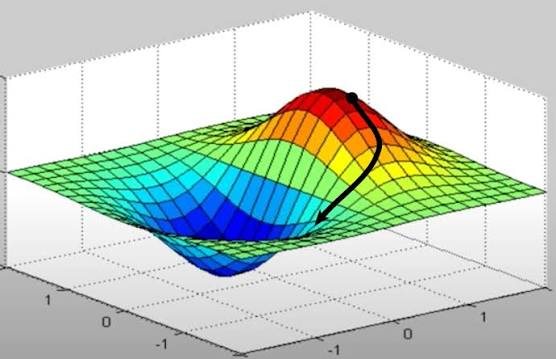
#**Custom Gradient Descent Implementation for Insurance ownership Prediction**

##**📘 Project Summary:**
This project focuses on building a custom Gradient Descent prediction function from scratch — replicating the core learning process of an Artificial Neural Network (ANN). Using only NumPy, a sigmoid activation function, and a weighted sum computation, the model was trained on an insurance dataset containing 8 features (7 input variables and 1 target variable).

The custom-built gradient descent model achieved an impressive 84% accuracy, matching the performance of a standard ANN trained on the same data. This demonstrates a strong understanding of the mathematical foundations of deep learning, including forward propagation, cost calculation, and weight updates through backpropagation.

Also going further this project  also cover areas of building  gradient decent fit function from scratch replicating the learning process of how Neural Network works displaying the number of epochs, weighted_sum, bias and loss

##**🎯 Aim of the Project:**
The main aim is to implement and understand the internal mechanics of gradient descent optimization used in neural networks. By coding the learning process manually, this project deepens the understanding of how machine learning models adjust their parameters to minimize loss and improve prediction accuracy.

It also shows how a simple mathematical approach can replicate the behavior of more complex ANN models for regression or classification tasks.

##**Data Loading and exploration**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/insurance2.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [ ]:
# confirming if my data has missing or null values
print(f"Null Values: {df.isna().sum()}")
print("\n")
print(f"Duplicate Values: {df.duplicated().sum()}")

Null Values: age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64


Duplicate Values: 1


In [ ]:
df.drop_duplicates(inplace=True)

##**checking if my target variable is imbalanced**

In [ ]:
df.insuranceclaim.value_counts()

,count
insuranceclaim,
1,782
0,555


##**Seperating input variable from target variable**

In [ ]:
x = df.drop(columns=["insuranceclaim"])
y = df["insuranceclaim"]

##**splitting data into training and testing sets to evaluate model performance**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {y_train.shape}")

x_train shape: (1069, 7)
x_test shape: (1069,)


##**Scaling features using MinMaxScaler (from 0 to 1)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_train = pd.DataFrame(scale.fit_transform(x_train), columns=x.columns)
x_test =  pd.DataFrame(scale.fit_transform(x_test), columns=x.columns)

##**Model Building: training ANN(Deep Learning) Model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
ANN = Sequential([Dense(1, input_shape=(7,), activation="sigmoid", kernel_initializer="ones", bias_initializer="zeros"),
                 ])
ANN.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

ANN.fit(x_train, y_train, epochs=150)

Epoch 1/150


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5785 - loss: 1.0551
Epoch 2/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6113 - loss: 0.9495
Epoch 3/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5890 - loss: 0.9309
Epoch 4/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5743 - loss: 0.9480
Epoch 5/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5745 - loss: 0.9314
Epoch 6/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5773 - loss: 0.9058
Epoch 7/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5794 - loss: 0.8615
Epoch 8/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5937 - loss: 0.8042
Epoch 9/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5865 - loss: 0.8215
Epoch 10/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5911 - loss: 0.7881
Epoch 11/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5906 - loss: 0.7709
Epoch 12/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5876

##**Model score**


In [ ]:
ANN.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8224 - loss: 0.4305  


[0.4322378635406494, 0.8358209133148193]

##**Comparing y_pred and y_test first 15 values to see performance**

In [ ]:
y_pred = ANN.predict(x_test)
y_pred = np.round(y_pred)
print(y_pred[:15])
print(y_test[:15])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
[[1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
324     1
472     1
745     1
765     1
541     0
1249    1
391     1
209     1
1173    0
684     0
1053    1
206     1
561     1
254     1
1110    1
Name: insuranceclaim, dtype: int64


##**Classification report(y_pred and y_test): Accuracy / F1-Score | 84%**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.66      0.77       111
           1       0.80      0.96      0.87       157

    accuracy                           0.84       268
   macro avg       0.86      0.81      0.82       268
weighted avg       0.85      0.84      0.83       268



##**Confusion matrix(y_pred and y_test)**

Text(0.5, 1.0, 'Confusion Matrix')

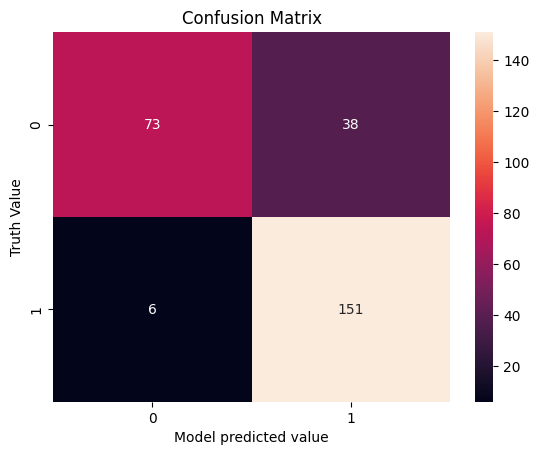

In [ ]:
cm = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Model predicted value")
plt.ylabel("Truth Value")
plt.title("Confusion Matrix")

##**Viewing the coefficient and intercept of my ANN**

In [ ]:
coef, intercept = ANN.get_weights()
print(f"This are the coefficients {coef}")
print("\n")
print(f"This is the intercept {intercept}")


This are the coefficients [[ 0.5447279 ]
 [-0.00836319]
 [ 2.5681396 ]
 [-2.3667042 ]
 [ 2.1541946 ]
 [-0.01443948]
 [ 0.80467147]]


This is the intercept [-0.7919395]


#**GRADIENT_DECENT  PREDICTION**

##**preparing my sigmoid function**

In [ ]:
def num_sigmoid(x):
  sigmoid = 1/(1+np.exp(-x))
  return sigmoid
num_sigmoid(9)

np.float64(0.9998766054240137)

##**Weighted sum function**

In [ ]:
def predict(x):
  weighted_sum = x['age']*coef[0] + x["sex"]*coef[1] + x["bmi"]*coef[2] + x["children"]* coef[3] + x["smoker"]* coef[4] + x["region"]* coef[5] + x["charges"]* coef[6] + intercept
  outcome = num_sigmoid(weighted_sum)
  return outcome

##**Verifying to see if my gradient decent prediction is thesame as my ANN prediction**

In [ ]:
#y_pred1 will be the new variable name for my gradient decent prediction
y_pred1 = predict(x_test)
y_pred1 = np.round(y_pred1).astype(int)

print(y_pred1[:15])
print(y_test[:15])


0     1
1     1
2     1
3     1
4     0
5     1
6     1
7     1
8     0
9     0
10    1
11    1
12    1
13    1
14    1
dtype: int64
324     1
472     1
745     1
765     1
541     0
1249    1
391     1
209     1
1173    0
684     0
1053    1
206     1
561     1
254     1
1110    1
Name: insuranceclaim, dtype: int64


##**Classification report(y_pred1 and y_test): Accuracy / F1-Score | 84%**

In [ ]:
cr2 = classification_report(y_test, y_pred1)
print(cr2)

              precision    recall  f1-score   support

           0       0.92      0.66      0.77       111
           1       0.80      0.96      0.87       157

    accuracy                           0.84       268
   macro avg       0.86      0.81      0.82       268
weighted avg       0.85      0.84      0.83       268



##**Confusion matrix(y_pred1 and y_test)**

Text(0.5, 1.0, 'Confusion Matrix')

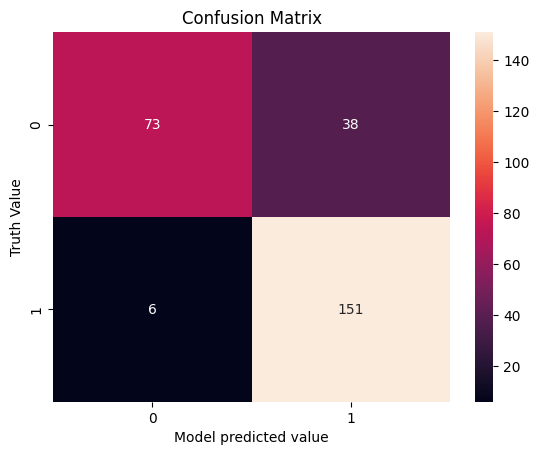

In [ ]:
cm = confusion_matrix(y_test, y_pred1)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Model predicted value")
plt.ylabel("Truth Value")
plt.title("Confusion Matrix")

##**GRADIENT DECENT BUILDING STAGE (FIT FUNCTION**

##**Preparing log_loss (loss) function**

In [ ]:
def log_loss(y_true, y_pred):
  eps = 1e-15
  y_pred = np.clip(y_pred, eps, 1 - eps )

  loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
  return loss

##**Building my Gradient decent fit function**

In [ ]:
def gradient_decent(x, y_true, epochs):
  w1 = w2 = w3 = w4 = w5 = w6 = w7 = 1
  bias = 0
  rate = 0.5
  n = len(x)

  for i in range(epochs):
    weighted_sum = w1*x[:,0] + w2*x[:,1] + w3*x[:,2] + w4*x[:,3] + w5*x[:,4] + w6*x[:,5] + w7*x[:,6] + bias
    y_pred = num_sigmoid(weighted_sum)

    loss = log_loss(y_true, y_pred)

    d1 = (1/n) * np.dot(np.transpose(x[:,0]), (y_pred - y_true))
    d2 = (1/n) * np.dot(np.transpose(x[:,1]), (y_pred - y_true))
    d3 = (1/n) * np.dot(np.transpose(x[:,2]), (y_pred - y_true))
    d4 = (1/n) * np.dot(np.transpose(x[:,3]), (y_pred - y_true))
    d5 = (1/n) * np.dot(np.transpose(x[:,4]), (y_pred - y_true))
    d6 = (1/n) * np.dot(np.transpose(x[:,5]), (y_pred - y_true))
    d7 = (1/n) * np.dot(np.transpose(x[:,6]), (y_pred - y_true))
    b1 = np.mean(y_pred - y_true)

    w1 = w1 - rate * d1
    w2 = w2 - rate * d2
    w3 = w3 - rate * d3
    w4 = w4 - rate * d4
    w5 = w5 - rate * d5
    w6 = w6 - rate * d6
    w7 = w7 - rate * d7
    bias = bias - rate * b1

    print(f"epochs:{i}, w1:{w1}, w2:{w2}, w3:{w3}, w4:{w4}, w5:{w5}, w6:{w6}, w7:{w7}, bias:{bias}, loss:{loss}")

  return w1, w2, w3, w4, w5, w6, w7, bias


In [ ]:
gradient_decent(x_train.values, y_train.values, epochs=224)

epochs:0, w1:0.9313206548261801, w2:0.914951652252031, w3:0.9533356892307792, w4:0.9402123740291475, w5:0.9945450638503044, w6:0.9172081934818372, w7:0.9804303884413812, bias:-0.1540929367149908, loss:1.0401249953674248
epochs:1, w1:0.8681000075385262, w2:0.8351264447518418, w3:0.9115247805473765, w4:0.8828955963688269, w5:0.9901306671278087, w6:0.8403475463488215, w7:0.962573747946157, bias:-0.29494272786620596, loss:0.9463229205600381
epochs:2, w1:0.8110969130722103, w2:0.761506927128438, w3:0.87516774379428, w4:0.8284173032437157, w5:0.986945107794509, w6:0.7702997087575774, w7:0.9466807541421999, bias:-0.4210604158305758, loss:0.8671411554984234
epochs:3, w1:0.7608390531550406, w2:0.6948723710061734, w3:0.8446576971240061, w4:0.7770471631919031, w5:0.9851450048881387, w6:0.7076955778216967, w7:0.9329350938118118, bias:-0.5315338876263619, loss:0.8027820485114948
epochs:4, w1:0.717534820215857, w2:0.63566799047146, w3:0.8201144397075986, w4:0.7289139451062847, w5:0.9848301192189727,

(np.float64(0.6041828485120134),
 np.float64(0.008456868868162375),
 np.float64(2.8262579637633807),
 np.float64(-2.76400121791397),
 np.float64(1.9753238821891137),
 np.float64(-0.002610423408314459),
 np.float64(1.0857865691416595),
 np.float64(-0.8840023310846599))

##**Comparing my gradient decent weighted_sum and bias to my ANN**

In [ ]:
print(f"This are the coefficients {coef}")
print("\n")
print(f"This is the intercept {intercept}")


This are the coefficients [[ 0.5447279 ]
 [-0.00836319]
 [ 2.5681396 ]
 [-2.3667042 ]
 [ 2.1541946 ]
 [-0.01443948]
 [ 0.80467147]]


This is the intercept [-0.7919395]


##**📊 Results & Insights:**

Dataset: Insurance dataset with 7 input features (e.g., age, , sex, bmi, children, smoker, region, charges) and 1 target variable (insuranceclaim).
Model Performance: 84% accuracy — comparable to ANN results.

Also my Gradient decent coefficients and intercept are very close to my ANN (coef and intercept)

The model effectively learned the relationship between input features and insurance charges using a custom-coded optimization loop without relying on deep learning frameworks.

##**Conclusion (Deployment Use Case):**
When deployed, this model can be used to predict if a person has insurance or not for new applicants based on their personal and demographic features.
Beyond predictions, this project serves as an educational and research tool — showcasing how gradient descent, weight updates, and activation functions work behind the scenes in neural networks.
It can also be extended to other regression and classification problems, forming the foundation for building custom AI models from scratch.


